In [1]:
from libraries import lib
import qutip as qt 
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from kan import *

In [ ]:
N = 8
J = 1
input = lib.generate_input_torch(N)
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])
Gamma = 1
h = lib.TFIM_hamiltonian(N, J, Gamma)
eigs = h.eigenstates()
true_gse = eigs[0][0]
true_gs = eigs[1][0]
print('gse', true_gse)
# print(true_gs.full().flatten())

gse -10.251661790966022


In [6]:
mlp_model = nn.Sequential(
    nn.Linear(N, N),
    nn.Sigmoid(),
    nn.Linear(N, 2),
    nn.Sigmoid()
)
mlp_epochs, mlp_loss_data = lib.train_model_to_gs(mlp_model, 
                      lambda model : model(input), 
                      lambda nn_output : lib.TFIM_expectation_from_torch(nn_output, (N, J, Gamma), amp_phase), 
                      1000, data_rate = 50)
# this took 2m 20s

In [17]:
mlp_gse = lib.TFIM_expectation_from_torch(mlp_model(input), (N, J, Gamma), amp_phase).item()
print('est', mlp_gse)
print('error', (mlp_gse - true_gse) ** 2)

est -10.13917350769043
error 0.012653613874289885


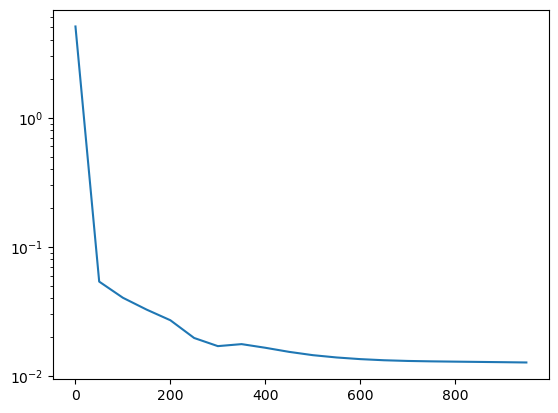

In [9]:
plt.plot(mlp_epochs, (np.array(mlp_loss_data) - np.array(len(mlp_loss_data) * [true_gse])) ** 2)
plt.yscale('log')
plt.show()

In [10]:
mlp_gs = lib.model_to_ground_state(mlp_model, input, amp_phase)
print('fidelity', qt.fidelity(mlp_gs, true_gs))

fidelity 0.7418266227698871


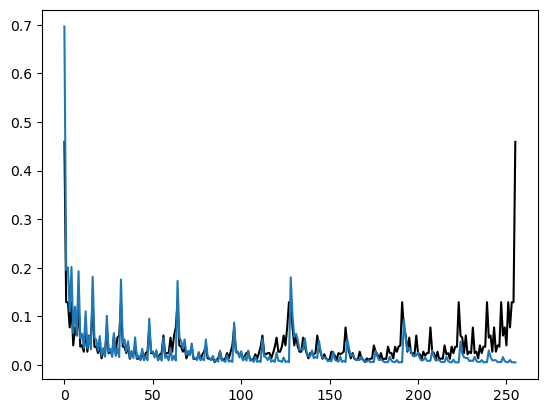

In [11]:
xvals = [n for n in range(0, 2 ** N)]
plt.plot(xvals, np.abs(true_gs.full().flatten()), color = 'black')
plt.plot(xvals, np.abs(mlp_gs.full().flatten()))
plt.show()

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
kan_model = KAN(width=[N, N, 2], device=device) 
loss_fn = lib.TFIM_expectation_from_torch
vars = (N, J, Gamma)

checkpoint directory created: ./model
saving model version 0.0


In [21]:
kan_epochs = []
kan_loss_data = []
optimizer = LBFGS(kan_model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
epoch = 0
while True:
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(kan_model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    kan_epochs.append(epoch)
    kan_loss_data.append(loss_fn(kan_model(input), vars, amp_phase).item())
    err = (kan_loss_data[-1] - true_gse) ** 2
    if err < 0.012653613874289885:
        break
    epoch += 1

# find groud state
kan_gs = lib.model_to_ground_state(kan_model, input, amp_phase)
# this took 2m 46s

In [25]:
kan_gse = kan_loss_data[-1]
print('epochs', len(kan_epochs))
print('est', kan_gse)
print('error', (kan_gse - true_gse) ** 2)
print('fidelity', qt.fidelity(kan_gs, true_gs))

epochs 47
est -10.14398193359375
error 0.011594951683712825
fidelity 0.9927573922351631


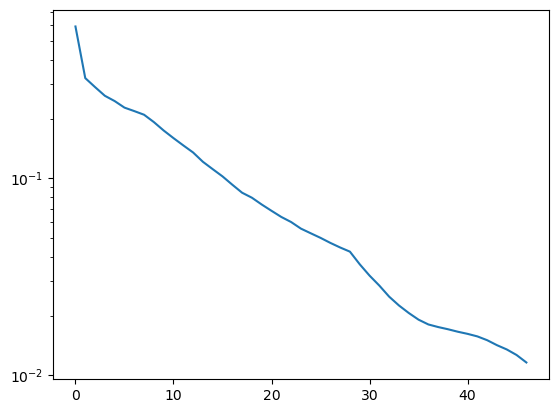

In [23]:
plt.plot(kan_epochs, (np.array(kan_loss_data) - np.array(len(kan_loss_data) * [true_gse])) ** 2)
plt.yscale('log')
plt.show()

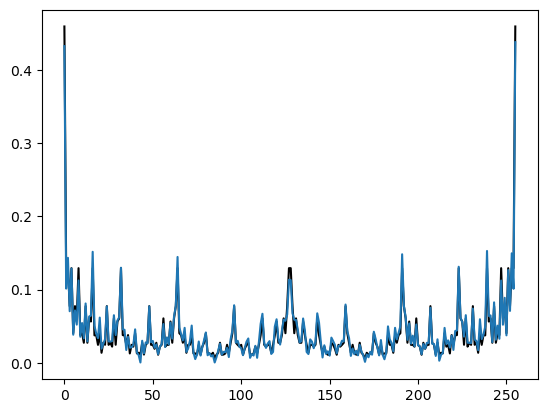

In [24]:
xvals = [n for n in range(0, 2 ** N)]
plt.plot(xvals, np.abs(true_gs.full().flatten()), color = 'black')
plt.plot(xvals, np.abs(kan_gs.full().flatten()))
plt.show()

In [26]:
Gamma = 0.1
h = lib.TFIM_hamiltonian(N, J, Gamma)
eigs = h.eigenstates()
true_gse = eigs[0][0]
true_gs = eigs[1][0]
print('gse', true_gse)

gse -8.020012533458656


In [27]:
mlp_model = nn.Sequential(
    nn.Linear(N, N),
    nn.Sigmoid(),
    nn.Linear(N, 2),
    nn.Sigmoid()
)
mlp_epochs, mlp_loss_data = lib.train_model_to_gs(mlp_model, 
                      lambda model : model(input), 
                      lambda nn_output : lib.TFIM_expectation_from_torch(nn_output, (N, J, Gamma), amp_phase), 
                      1000, data_rate = 50)
# this took 2m 34s

In [28]:
mlp_gse = lib.TFIM_expectation_from_torch(mlp_model(input), (N, J, Gamma), amp_phase).item()
print('est', mlp_gse)
print('error', (mlp_gse - true_gse) ** 2)

est -8.019966125488281
error 2.153699714329536e-09


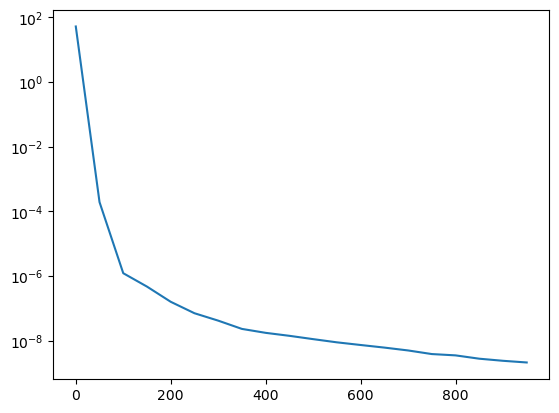

In [29]:
plt.plot(mlp_epochs, (np.array(mlp_loss_data) - np.array(len(mlp_loss_data) * [true_gse])) ** 2)
plt.yscale('log')
plt.show()

In [30]:
mlp_gs = lib.model_to_ground_state(mlp_model, input, amp_phase)
print('fidelity', qt.fidelity(mlp_gs, true_gs))

fidelity 0.7071392112329854


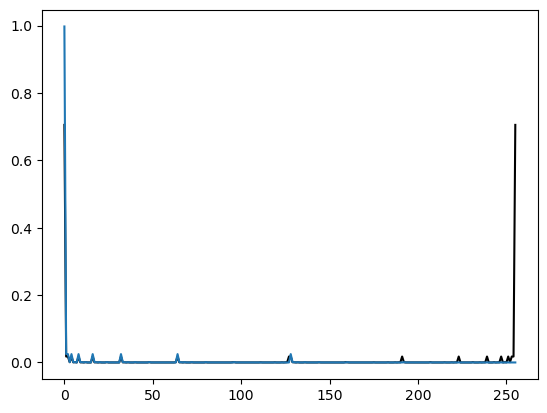

In [31]:
xvals = [n for n in range(0, 2 ** N)]
plt.plot(xvals, np.abs(true_gs.full().flatten()), color = 'black')
plt.plot(xvals, np.abs(mlp_gs.full().flatten()))
plt.show()

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
kan_model = KAN(width=[N, N, 2], device=device) 
loss_fn = lib.TFIM_expectation_from_torch
vars = (N, J, Gamma)

checkpoint directory created: ./model
saving model version 0.0


In [ ]:
kan_epochs = []
kan_loss_data = []
optimizer = LBFGS(kan_model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
epoch = 0
while True:
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(kan_model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    kan_epochs.append(epoch)
    kan_loss_data.append(loss_fn(kan_model(input), vars, amp_phase).item())
    err = (kan_loss_data[-1] - true_gse) ** 2
    if err < (mlp_gse - true_gse) ** 2:
        break
    epoch += 1

# find groud state
kan_gs = lib.model_to_ground_state(kan_model, input, amp_phase)
# stopped at 5m 15s

KeyboardInterrupt: 

In [35]:
kan_gse = kan_loss_data[-1]
print('epochs', len(kan_epochs))
print('est', kan_gse)
print('error', (kan_gse - true_gse) ** 2)
print('fidelity', qt.fidelity(kan_gs, true_gs))

epochs 167
est -6.000486373901367
error 4.078485909136213
fidelity 0.6518748238028063


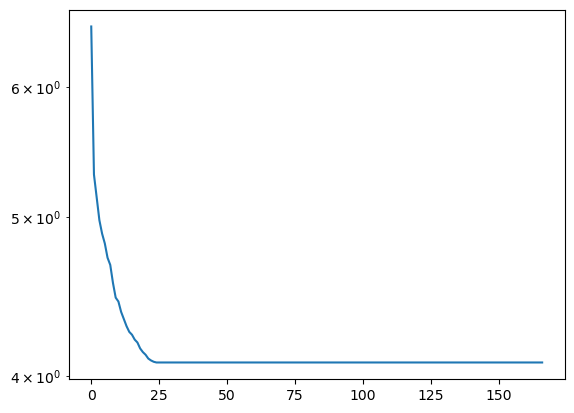

In [36]:
plt.plot(kan_epochs, (np.array(kan_loss_data) - np.array(len(kan_loss_data) * [true_gse])) ** 2)
plt.yscale('log')
plt.show()

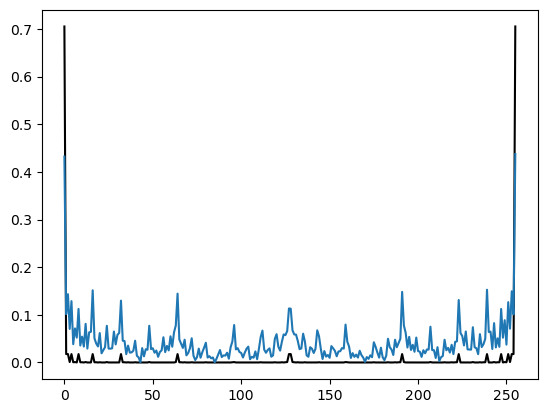

In [37]:
xvals = [n for n in range(0, 2 ** N)]
plt.plot(xvals, np.abs(true_gs.full().flatten()), color = 'black')
plt.plot(xvals, np.abs(kan_gs.full().flatten()))
plt.show()

In [39]:
Gamma = 10
h = lib.TFIM_hamiltonian(N, J, Gamma)
eigs = h.eigenstates()
true_gse = eigs[0][0]
true_gs = eigs[1][0]
print('gse', true_gse)

gse -80.20012533458659


In [40]:
mlp_model = nn.Sequential(
    nn.Linear(N, N),
    nn.Sigmoid(),
    nn.Linear(N, 2),
    nn.Sigmoid()
)
mlp_epochs, mlp_loss_data = lib.train_model_to_gs(mlp_model, 
                      lambda model : model(input), 
                      lambda nn_output : lib.TFIM_expectation_from_torch(nn_output, (N, J, Gamma), amp_phase), 
                      1000, data_rate = 50)
# this took 3m 41s

In [45]:
mlp_gse = lib.TFIM_expectation_from_torch(mlp_model(input), (N, J, Gamma), amp_phase).item()
print('est', mlp_gse)
print('error', (mlp_gse - true_gse) ** 2)

est -80.17960357666016
error 0.00042114254839105024


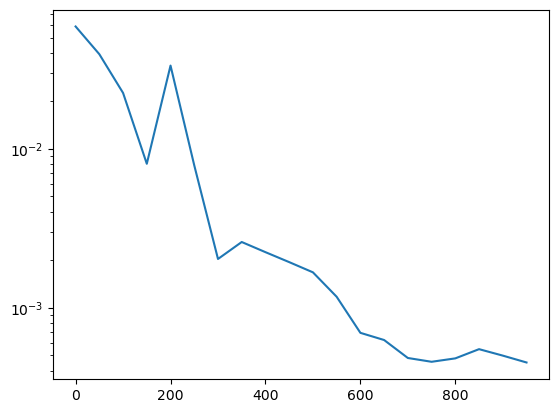

In [42]:
plt.plot(mlp_epochs, (np.array(mlp_loss_data) - np.array(len(mlp_loss_data) * [true_gse])) ** 2)
plt.yscale('log')
plt.show()

In [46]:
mlp_gs = lib.model_to_ground_state(mlp_model, input, amp_phase)
print('fidelity', qt.fidelity(mlp_gs, true_gs))

fidelity 0.9996517004052062


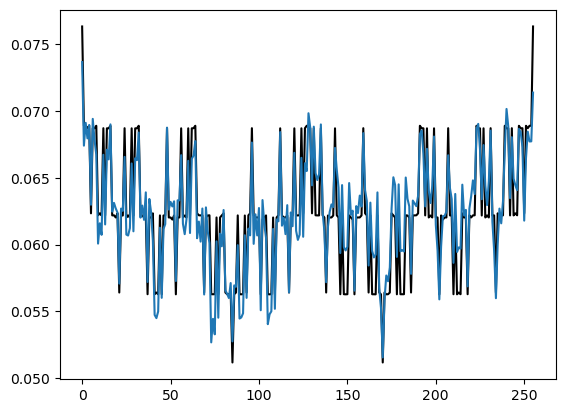

In [47]:
xvals = [n for n in range(0, 2 ** N)]
plt.plot(xvals, np.abs(true_gs.full().flatten()), color = 'black')
plt.plot(xvals, np.abs(mlp_gs.full().flatten()))
plt.show()

In [48]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
kan_model = KAN(width=[N, N, 2], device=device) 
loss_fn = lib.TFIM_expectation_from_torch
vars = (N, J, Gamma)

checkpoint directory created: ./model
saving model version 0.0


In [49]:
kan_epochs = []
kan_loss_data = []
optimizer = LBFGS(kan_model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
epoch = 0
while True:
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(kan_model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    kan_epochs.append(epoch)
    kan_loss_data.append(loss_fn(kan_model(input), vars, amp_phase).item())
    err = (kan_loss_data[-1] - true_gse) ** 2
    if err < (mlp_gse - true_gse) ** 2:
        break
    epoch += 1

# find groud state
kan_gs = lib.model_to_ground_state(kan_model, input, amp_phase)
# this took 10s

In [50]:
kan_gse = kan_loss_data[-1]
print('epochs', len(kan_epochs))
print('est', kan_gse)
print('error', (kan_gse - true_gse) ** 2)
print('fidelity', qt.fidelity(kan_gs, true_gs))

epochs 2
est -80.18781280517578
error 0.00015159838049197272
fidelity 0.9998496270469648


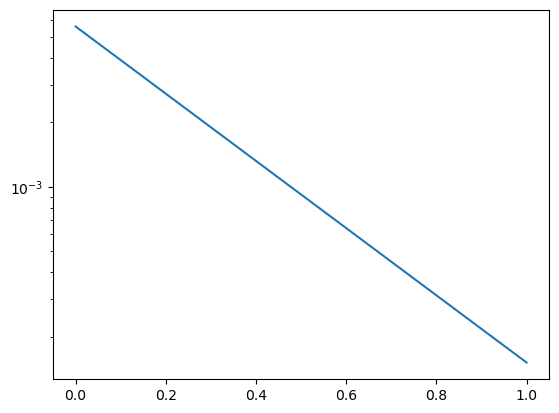

In [51]:
plt.plot(kan_epochs, (np.array(kan_loss_data) - np.array(len(kan_loss_data) * [true_gse])) ** 2)
plt.yscale('log')
plt.show()

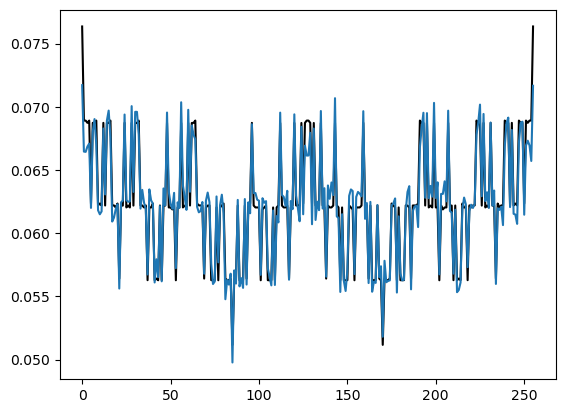

: 

In [52]:
xvals = [n for n in range(0, 2 ** N)]
plt.plot(xvals, np.abs(true_gs.full().flatten()), color = 'black')
plt.plot(xvals, np.abs(kan_gs.full().flatten()))
plt.show()